# Prediction using Supervised ML

Predict the percentage of an student based on the no of study hours.
The data is in " http://bit.ly/w-data "

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('fichier.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=25, step=1)

In [6]:
df.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [49]:
Scores=df['Scores']
Hours=df['Hours']

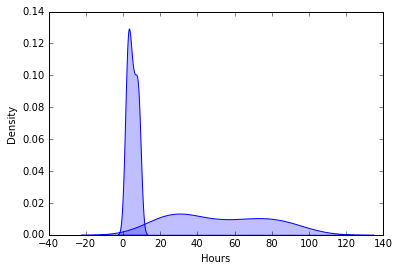

In [43]:
data = pd.DataFrame(df, columns=['Hours', 'Scores'])

for col in data:
    sns.kdeplot(data[col], shade=True)


C:\Users\CHAYMAE_AKK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CHAYMAE_AKK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


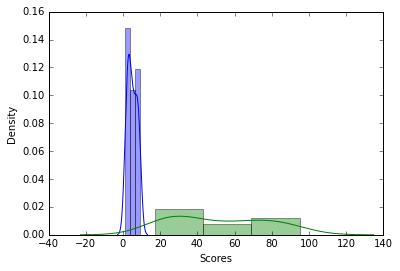

In [44]:
sns.distplot(data['Hours'])
sns.distplot(data['Scores']);

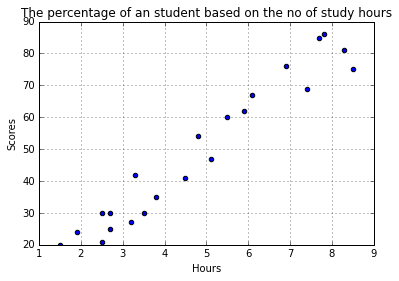

In [63]:
plt.scatter(Hours,Scores)
plt.title("The percentage of an student based on the no of study hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.xlim(xmin = 1, xmax =9 )
plt.ylim(ymin = 20, ymax = 90)
plt.grid(True)
plt.show()

Preparing ythe data

In [76]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [77]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, random_state=0) 

Training the Algorithm

In [78]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


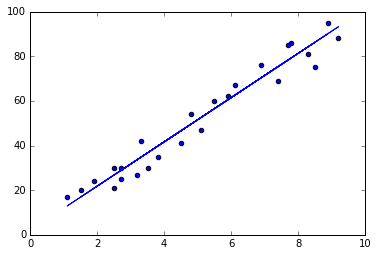

In [79]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Predictions

In [80]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [91]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [88]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
